In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_neurons = [5,10,15,20,25]
all_average_metrics = []

In [3]:
def plot_loss_and_save(num_neuron,fold_average_stats):
    plt.plot(fold_average_stats.epoch,fold_average_stats.loss)
    plt.plot(fold_average_stats.epoch,fold_average_stats.val_loss)
    plt.title('num_neuron %s ave model loss'%(num_neuron))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','validate'], loc= 'upper right' )
    plt.ylim(0,1)
    plt.savefig('./figures/3A_num_neuron_%s_average_loss.png'%(num_neuron))
    plt.show()

In [4]:
def plot_acc_and_save(num_neuron,fold_average_stats):
    plt.plot(fold_average_stats.epoch,fold_average_stats.accuracy)
    plt.plot(fold_average_stats.epoch,fold_average_stats.val_accuracy)
    plt.title('num_neuron %s ave accuracy'%(num_neuron))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validate'], loc= 'lower right' )
    plt.ylim(0.7,1)
    plt.savefig('./figures/3A_num_neuron_%s_average_accuracy.png'%(num_neuron))
    plt.show()

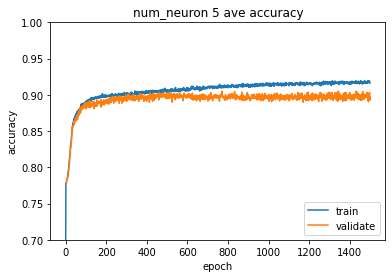

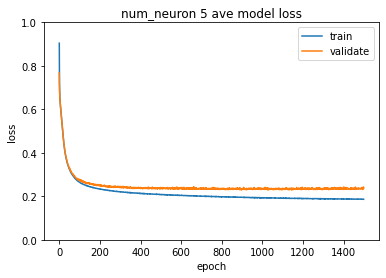

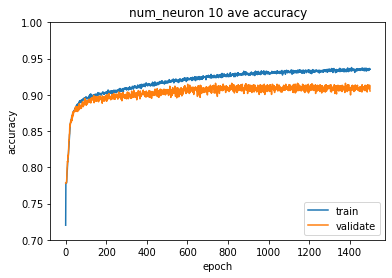

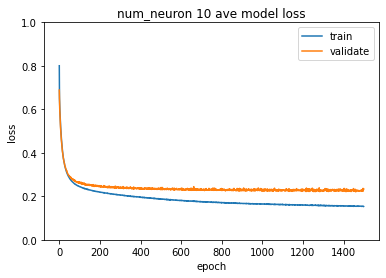

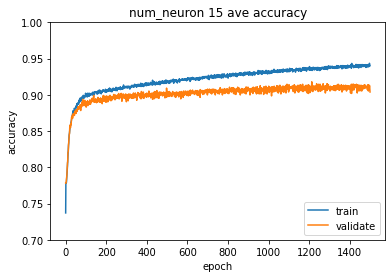

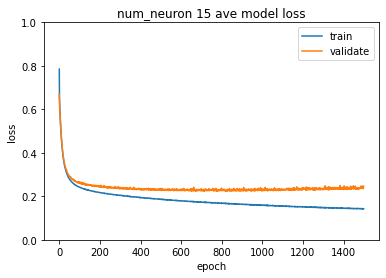

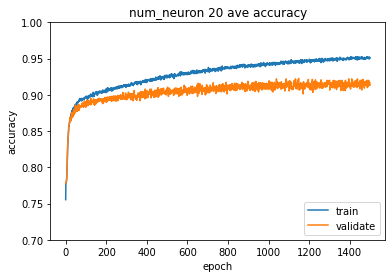

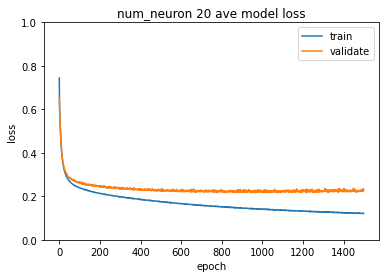

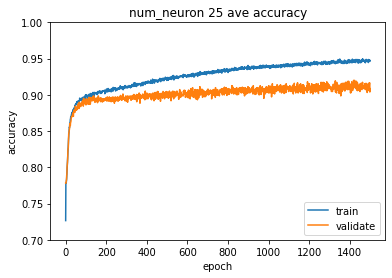

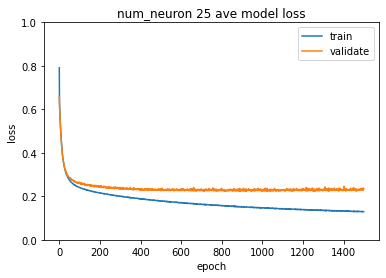

In [5]:
#Load results from the 3A-overfit notebook to calculate and plot the average curves for each hyperparameter model isntances
for num_neuron in num_neurons:
    fold_0_df = pd.read_csv("./no_early/3A_fold_0_neuron_%s.csv"%(num_neuron))
    fold_1_df = pd.read_csv("./no_early/3A_fold_1_neuron_%s.csv"%(num_neuron))
    fold_2_df = pd.read_csv("./no_early/3A_fold_2_neuron_%s.csv"%(num_neuron))
    fold_3_df = pd.read_csv("./no_early/3A_fold_3_neuron_%s.csv"%(num_neuron))
    fold_4_df = pd.read_csv("./no_early/3A_fold_4_neuron_%s.csv"%(num_neuron))
    average_metrics = (fold_0_df + fold_1_df + fold_2_df  + fold_3_df  + fold_4_df)/5
    all_average_metrics.append(average_metrics)
    plot_acc_and_save(num_neuron,average_metrics)
    plot_loss_and_save(num_neuron,average_metrics)

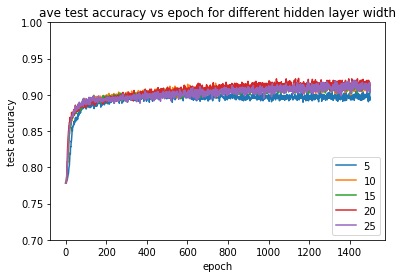

In [6]:
#Plot all test accuracy against epoch for comparison
for model_idx in all_average_metrics:
    plt.plot(model_idx.epoch,model_idx.val_accuracy)
plt.title('ave test accuracy vs epoch for different hidden layer width')
plt.ylabel('test accuracy')
plt.xlabel('epoch')
plt.legend([5,10,15,20,25], loc= 'lower right' )
plt.ylim(0.7,1)
plt.savefig('./figures/3A_test_Acc_tgt.png')
plt.show()

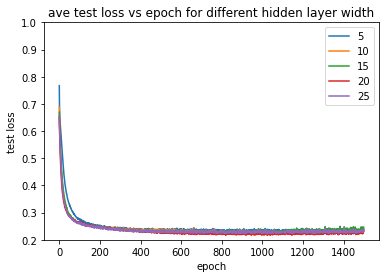

In [7]:
#Plot all test accuracy against epoch for comparison
for model_idx in all_average_metrics:
    plt.plot(model_idx.epoch,model_idx.val_loss)
plt.title('ave test loss vs epoch for different hidden layer width')
plt.ylabel('test loss')
plt.xlabel('epoch')
plt.legend([5,10,15,20,25], loc= 'upper right' )
plt.ylim(0.2,1)
plt.savefig('./figures/3A_test_loss_tgt.png')
plt.show()